# Data Representation with Tensors

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/deeplearning_with_pytorch")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Image dog

In [3]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [4]:
import imageio # use imageio to load images to numpy

img_arr = imageio.imread('./data/p1ch4/image-dog/bobby.jpg')
img_arr.shape

(720, 1280, 3)

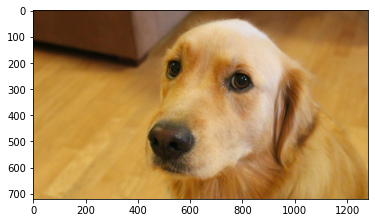

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img_arr)

In [6]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1) # change to C, H, W

In [7]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8) # preparing batches

In [8]:
import os

data_dir = './data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # take only three channels as some images have an extra alpha channel
    batch[i] = img_t

In [9]:
# naive normalization by dividing by 255
batch = batch.float()
batch /= 255.0

In [10]:
# using mean and std of each channel to normalize
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

## 3D image

In [11]:
# use PET-CT data in DICOM format
# 99 images of lung PET-CT

dir_path = './data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083'
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%)2/99 files (2.0%)3/99 files (3.0%)4/99 files (4.0%)5/99 files (5.1%)6/99 files (6.1%)7/99 files (7.1%)8/99 files (8.1%)9/99 files (9.1%)10/99 files (10.1%)11/99 files (11.1%)12/99 files (12.1%)13/99 files (13.1%)14/99 files (14.1%)15/99 files (15.2%)16/99 files (16.2%)17/99 files (17.2%)18/99 files (18.2%)19/99 files (19.2%)20/99 files (20.2%)21/99 files (21.2%)22/99 files (22.2%)23/99 files (23.2%)24/99 files (24.2%)25/99 files (25.3%)26/99 files (26.3%)27/99 files (27

(99, 512, 512)

In [12]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

vol.shape

torch.Size([1, 99, 512, 512])

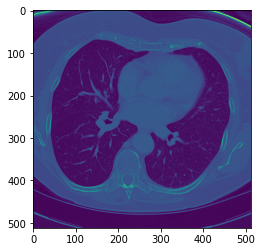

In [13]:
%matplotlib inline

plt.imshow(vol_arr[50])

## Tabular Data

In [14]:
# better to use pandas...but book uses numpy so might as well try...
import csv
wine_path = "./data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [15]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [16]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [17]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]), torch.Size([4898, 11]))

In [18]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [19]:
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

In [20]:
# one hot encoding
target_onehot = torch.zeros(target.shape[0], 10)

target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [21]:
target_onehot[0]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [22]:
# can also just unsqueenze target to use it as it is
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [23]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [24]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [25]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [26]:
# also categorize target using thresholds
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [27]:
# index using boolean values
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [28]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [29]:
# sulfur dioxide is high for bad wines...
total_sulfur_threshold = 141.83
total_sulfur_data = data[:, 6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [30]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [31]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

## Time Series data

In [32]:
bikes_numpy = np.loadtxt(
    "./data/p1ch4/bike-sharing-dataset/hour-fixed.csv",
    dtype=np.float32,
    delimiter=",",
    skiprows=1,
    converters={1: lambda x: float(x[8:10])}
)

bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
        [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
        ...,
        [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
        [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]])

In [33]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [34]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1]) # sort by hours and days
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [35]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [36]:
# one hot encode weathers
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:, 9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

In [37]:
weather_onehot.scatter_(
    dim=1,
    index=first_day[:, 9].unsqueeze(1).long() - 1,
    value=1.0
)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [38]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

In [39]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])

daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [40]:
daily_weather_onehot.scatter_(
    1, daily_bikes[:, 9, :].long().unsqueeze(1) -1, 1.0
)

daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [41]:
#concat all data
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

In [42]:
# normalization techniques
daily_bikes[:, 9, :] = (daily_bikes[:, 9, :] -1.0) / 3.0

temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min)
                         / (temp_max - temp_min))

temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))
                         / torch.std(temp))

# Text Data

In [43]:
with open('./data/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [44]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [45]:
# convert by character
letter_t = torch.zeros(len(line), 128) 
letter_t.shape

torch.Size([70, 128])

In [46]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

In [47]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [48]:
# put into set to get only the distinct values
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}

len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [49]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
  word_index = word2index_dict[word]
  word_t[i][word_index] = 1
  print('{:2} {:4} {}'.format(i, word_index, word))

print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


In [50]:
word_t = word_t.unsqueeze(1)
word_t.shape

torch.Size([11, 1, 7261])

## Video

- video data can be seen as equivalent to volumetric data, with depth replaced with time dimension. So the 5D tensor with shape N x C x T x H x W

In [52]:
# using 100 consecutive frames in 512 x 512 RBG video
reader = imageio.get_reader("./data/p1ch4/video-cockatoo/cockatoo.mp4")

In [53]:
meta = reader.get_meta_data()
meta

{'duration': 14.0,
 'ffmpeg_version': '3.4.8-0ubuntu0.2 built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)',
 'fps': 20.0,
 'nframes': 280,
 'plugin': 'ffmpeg',
 'size': (1280, 720),
 'source_size': (1280, 720)}

In [56]:
image = next(iter(reader))

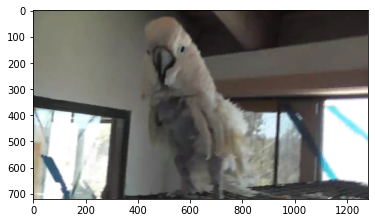

In [58]:
# its a parrot!
plt.imshow(image)

In [59]:
# all info to the size the tensor is stored in the video frames
n_channels = 3
n_frames = meta['nframes']
video = torch.empty(n_channels, n_frames, *meta['size'])

video.shape

torch.Size([3, 280, 1280, 720])

In [60]:
# iter over reader and set values to proper ith time slice
for i, frame_arr in enumerate(reader):
    frame = torch.from_numpy(frame_arr).float()
    video[:, i] = torch.transpose(frame, 0, 2)

- above iterate over frame in C x T x H x W video tensor. Then we can obtain batch by stacking multiple 4D tensors, or pre-allocate 5D tensor and fill it in

In [61]:
# one can also batch along frame
time_video = torch.empty(n_frames, n_channels, *meta['size'])

for i, frame in enumerate(reader):
    frame = torch.from_numpy(frame).float()
    time_video[i] = torch.transpose(frame, 0, 2)

time_video.shape

torch.Size([280, 3, 1280, 720])

## Audio

- sound can be seen as fluctuations of pressure of air at certain location in time, where pressure fluctuate with a freqeuncy between 20 and 20000 oscillations per second. 
- each time point converted into a 16-bit integer. Known as Pulse Code Modulation where continuous signal is both sampled in time and quantized in amplitude. 

In [62]:
import scipy.io.wavfile as wavfile

freq, waveform_arr = wavfile.read('./data/p1ch4/audio-chirp/1-100038-A-14.wav')
freq, waveform_arr

(44100, array([ -388, -3387, -4634, ...,  2289,  1327,    90], dtype=int16))

- read function returns two outputs, sampling frequency and waveform as 16 bit integer 1D array.

In [63]:
# we can convert the array to a tensor
waveform = torch.from_numpy(waveform_arr).float()
waveform.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  


torch.Size([220500])

- For architectures based on filtering the 1D signal with cascades of learned filter banks, such as convolutional networks, we would need to lay out the tensor as N x C x L, where N is the number of sounds in a dataset, C the number of channels and L the number of samples in time.

- Conversely, for architectures that incorporate the notion of temporal sequences, just as recurrent networks we mentioned for text, data needs to be laid out as L x N x C - sequence length comes first. Intuitively, this is because the latter architectures take one set of C values at a time - the signal is not considered as a whole, but as an individual input changing in time.

In [ ]:
# Fourier transform make sound into image (Spectogram)
# Fast Fourier Transform algorithm allows us to achieve this. 


- This is the general idea and we won't go into too many details here. Luckily for us SciPy has a function that gets us a shiny spectrogram given an input waveform. We import the signal module from SciPy, then provide the spectrogram function with the waveform and the sampling frequency that we got previously. The return values are all NumPy arrays, namely frequency f_arr (values along the Y axis), time t_arr (values along the X axis) and the actual spectrogra sp_arr as a 2D array. Turning the latter into a PyTorch tensor is trivial:

In [65]:
from scipy import signal
f_arr, t_arr, sp_arr = signal.spectrogram(waveform_arr, freq)

sp_mono = torch.from_numpy(sp_arr)
sp_mono.shape # dimension is F x T. F is frequency, T is time

torch.Size([129, 984])

In [66]:
# stereo usually have two channles, so lead to a two-channel spectrogram
sp_left = sp_right = sp_arr
sp_left_t = torch.from_numpy(sp_left)
sp_right_t = torch.from_numpy(sp_right)
sp_left_t.shape, sp_right_t.shape

(torch.Size([129, 984]), torch.Size([129, 984]))

In [67]:
# and stack them up
sp_t = torch.stack((sp_left_t, sp_right_t), dim=0)
sp_t.shape

torch.Size([2, 129, 984])